In [ ]:
import heapq

class Node:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0  # Cost from start node to current node
        self.h = 0  # Estimated cost from current node to target node
        self.f = 0  # Total cost (g + h)

    def __lt__(self, other):
        return self.f < other.f

def astar(grid, start, end):
    open_list = []
    closed_list = set()

    start_node = Node(start)
    end_node = Node(end)

    heapq.heappush(open_list, start_node)

    while open_list:
        current_node = heapq.heappop(open_list)

        if current_node.position == end_node.position:
            path = []
            while current_node is not None:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]  # Return reversed path

        closed_list.add(current_node.position)

        for next_position in [(0, -1), (0, 1), (-1, 0), (1, 0)]:  # Adjacent nodes
            node_position = (current_node.position[0] + next_position[0], current_node.position[1] + next_position[1])

            if node_position[0] < 0 or node_position[0] >= len(grid) or \
               node_position[1] < 0 or node_position[1] >= len(grid[0]):
                continue

            if grid[node_position[0]][node_position[1]] == 1:
                continue

            if node_position in closed_list:
                continue

            new_node = Node(node_position, current_node)
            new_node.g = current_node.g + 1
            new_node.h = abs(node_position[0] - end_node.position[0]) + abs(node_position[1] - end_node.position[1])
            new_node.f = new_node.g + new_node.h

            heapq.heappush(open_list, new_node)

    return None  # No path found

# Example usage:
grid = [
    [0, 0, 0, 0],
    [0, 1, 1, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
]
start = (0, 0)
end = (3, 3)

path = astar(grid, start, end)
if path:
    print("Shortest path:", path)
else:
    print("No path found.")


Shortest path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3)]


Shortest path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5)]


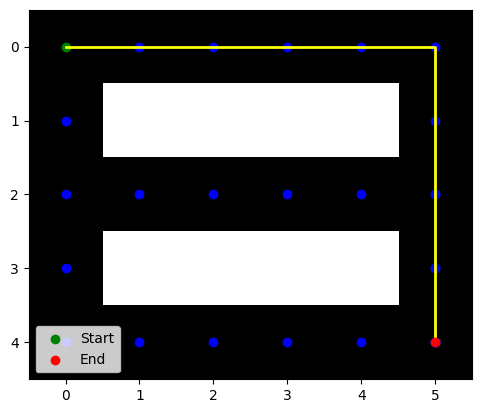

In [ ]:
import heapq
import matplotlib.pyplot as plt

class Node:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0  # Cost from start node to current node
        self.h = 0  # Estimated cost from current node to target node
        self.f = 0  # Total cost (g + h)

    def __lt__(self, other):
        return self.f < other.f

def astar(grid, start, end):
    open_list = []
    closed_list = set()

    start_node = Node(start)
    end_node = Node(end)

    heapq.heappush(open_list, start_node)

    while open_list:
        current_node = heapq.heappop(open_list)

        if current_node.position == end_node.position:
            path = []
            while current_node is not None:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]  # Return reversed path

        closed_list.add(current_node.position)

        for next_position in [(0, -1), (0, 1), (-1, 0), (1, 0)]:  # Adjacent nodes
            node_position = (current_node.position[0] + next_position[0], current_node.position[1] + next_position[1])

            if node_position[0] < 0 or node_position[0] >= len(grid) or \
               node_position[1] < 0 or node_position[1] >= len(grid[0]):
                continue

            if grid[node_position[0]][node_position[1]] == 1:
                continue

            if node_position in closed_list:
                continue

            new_node = Node(node_position, current_node)
            new_node.g = current_node.g + 1
            new_node.h = abs(node_position[0] - end_node.position[0]) + abs(node_position[1] - end_node.position[1])
            new_node.f = new_node.g + new_node.h

            heapq.heappush(open_list, new_node)

            # Visualization
            plt.scatter(node_position[1], node_position[0], color='blue')

    return None  # No path found

# Example usage:
# grid = [
#     [0, 0, 0, 0],
#     [0, 1, 1, 0],
#     [0, 0, 0, 0],
#     [0, 0, 0, 0]
# ]
# start = (0, 0)
# end = (3, 3)


# New input grid
grid = [
    [0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0]
]
start = (0, 0)
end = (4, 5)


# Visualization
# plt.imshow(grid, cmap='gray')
# plt.scatter(start[1], start[0], color='green', marker='o', label='Start')
# plt.scatter(end[1], end[0], color='red', marker='o', label='End')

# path = astar(grid, start, end)
# if path:
#     print("Shortest path:", path)
#     path_x = [pos[1] for pos in path]
#     path_y = [pos[0] for pos in path]
#     plt.plot(path_x, path_y, color='yellow', linewidth=2)
# else:
#     print("No path found.")

# plt.legend()
# plt.show()



# Visualization
plt.imshow(grid, cmap='gray')
plt.scatter(start[1], start[0], color='green', marker='o', label='Start')
plt.scatter(end[1], end[0], color='red', marker='o', label='End', zorder=5)  # Adjust zorder to make sure end point is visible

path = astar(grid, start, end)
if path:
    print("Shortest path:", path)
    path_x = [pos[1] for pos in path]
    path_y = [pos[0] for pos in path]
    plt.plot(path_x, path_y, color='yellow', linewidth=2)
else:
    print("No path found.")

plt.legend()
plt.show()

Path found: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


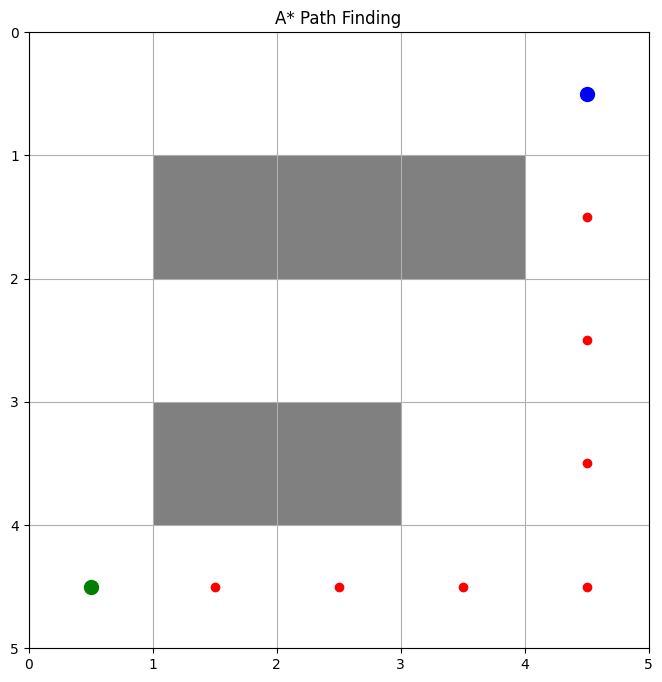

In [2]:
import heapq
import matplotlib.pyplot as plt

# Define grid dimensions
ROWS = 5
COLS = 5

# Define grid with obstacles
grid = [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

# Define start and end points
start = (0, 0)
end = (4, 4)

# Define possible movements (up, down, left, right)
movements = [(0, 1), (0, -1), (1, 0), (-1, 0)]

def heuristic(a, b):
    # Manhattan distance heuristic
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(start, end):
    open_list = []
    closed_list = set()
    heapq.heappush(open_list, (0, start))
    came_from = {}
    g_score = {start: 0}

    while open_list:
        current_cost, current_node = heapq.heappop(open_list)

        if current_node == end:
            path = []
            while current_node in came_from:
                path.append(current_node)
                current_node = came_from[current_node]
            path.append(start)
            path.reverse()
            return path

        closed_list.add(current_node)

        for move in movements:
            neighbor = (current_node[0] + move[0], current_node[1] + move[1])

            if neighbor[0] < 0 or neighbor[0] >= ROWS or neighbor[1] < 0 or neighbor[1] >= COLS:
                continue

            if grid[neighbor[0]][neighbor[1]] == 1:
                continue

            tentative_g_score = g_score[current_node] + 1

            if neighbor in closed_list and tentative_g_score >= g_score.get(neighbor, float('inf')):
                continue

            if tentative_g_score < g_score.get(neighbor, float('inf')) or neighbor not in [i[1] for i in open_list]:
                came_from[neighbor] = current_node
                g_score[neighbor] = tentative_g_score
                f_score = tentative_g_score + heuristic(neighbor, end)
                heapq.heappush(open_list, (f_score, neighbor))

    return None

path = astar(start, end)
if path:
    print("Path found:", path)
else:
    print("No path found")

# Plotting the grid with the path
plt.figure(figsize=(8, 8))
for i in range(ROWS):
    for j in range(COLS):
        if grid[i][j] == 1:
            plt.fill([j, j+1, j+1, j], [ROWS-i, ROWS-i, ROWS-i-1, ROWS-i-1], 'gray')

for node in path:
    plt.plot(node[1] + 0.5, ROWS - node[0] - 0.5, 'ro')

plt.plot(start[1] + 0.5, ROWS - start[0] - 0.5, 'go', markersize=10)
plt.plot(end[1] + 0.5, ROWS - end[0] - 0.5, 'bo', markersize=10)

plt.xlim(0, COLS)
plt.ylim(0, ROWS)
plt.gca().invert_yaxis()
plt.grid(True)
plt.title("A* Path Finding")
plt.show()

